# Sparse Hebbian Learning 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%run setup.py --description

 This is a collection of python scripts to test learning strategies to efficiently code natural image patches.  This is here restricted  to the framework of the [SparseNet algorithm from Bruno Olshausen](http://redwood.berkeley.edu/bruno/sparsenet/).


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

Extracting data..loading the data called : probe/cache_dir/data_data
Data is of shape : (65520, 324) - done in 0.10s.
No cache found probe/cache_dir/HULK_homeo_dico.pkl: Learning the dictionary with algo = mp 
 Training on 65520 patches
Iteration   1 /   1025 (elapsed time:   0s,   0mn   0s)
Iteration  33 /   1025 (elapsed time:   5s,   0mn   5s)
Iteration  65 /   1025 (elapsed time:  11s,   0mn  11s)
Iteration  97 /   1025 (elapsed time:  16s,   0mn  16s)
Iteration  129 /   1025 (elapsed time:  21s,   0mn  21s)
Iteration  161 /   1025 (elapsed time:  26s,   0mn  26s)
Iteration  193 /   1025 (elapsed time:  32s,   0mn  32s)
Iteration  225 /   1025 (elapsed time:  37s,   0mn  37s)
Iteration  257 /   1025 (elapsed time:  43s,   0mn  43s)
Iteration  289 /   1025 (elapsed time:  48s,   0mn  48s)
Iteration  321 /   1025 (elapsed time:  54s,   0mn  54s)
Iteration  353 /   1025 (elapsed time:  59s,   0mn  59s)
Iteration  385 /   1025 (elapsed time:  64s,   1mn   4s)
Iteration  417 /   1025 (e

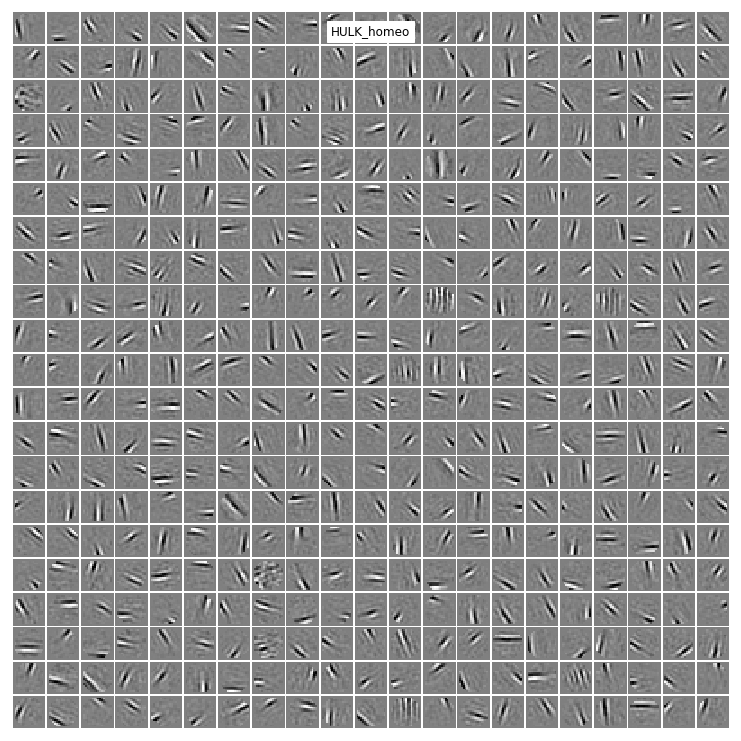

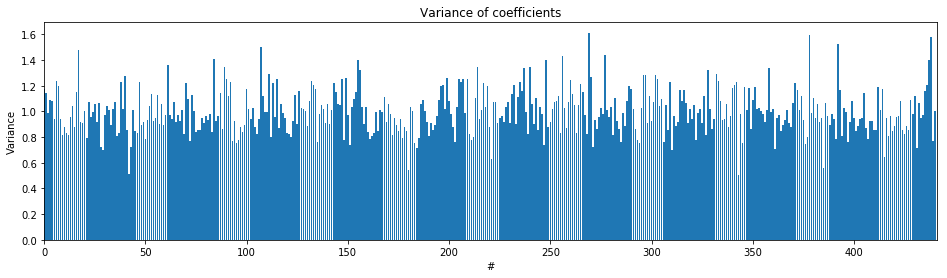

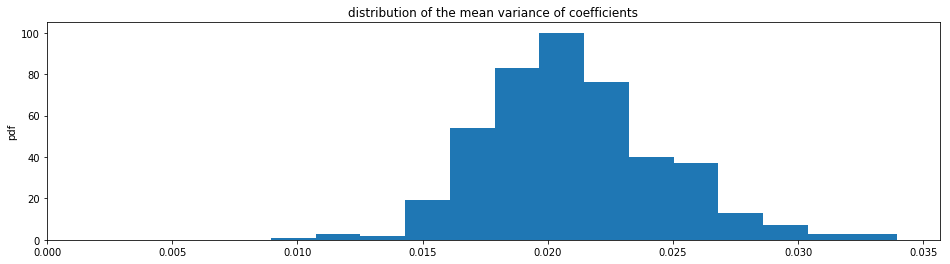

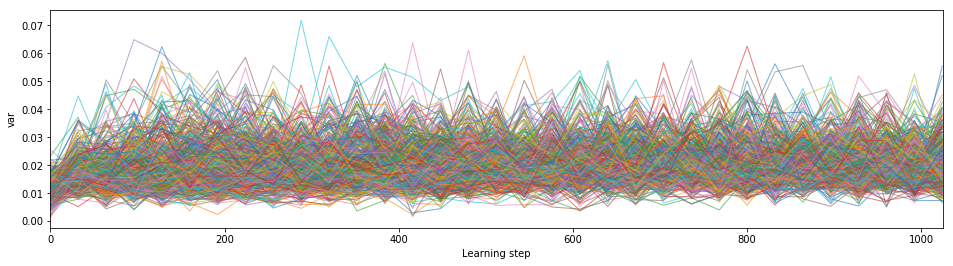

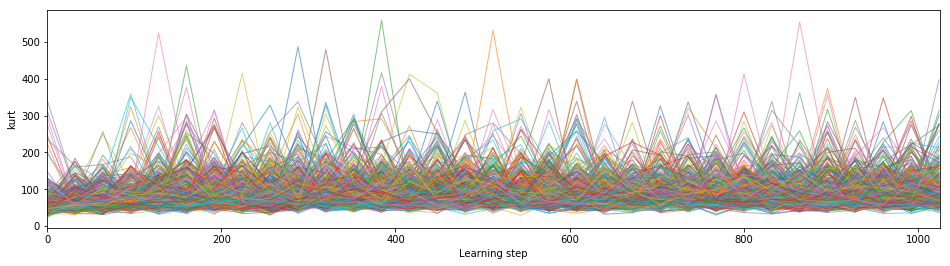

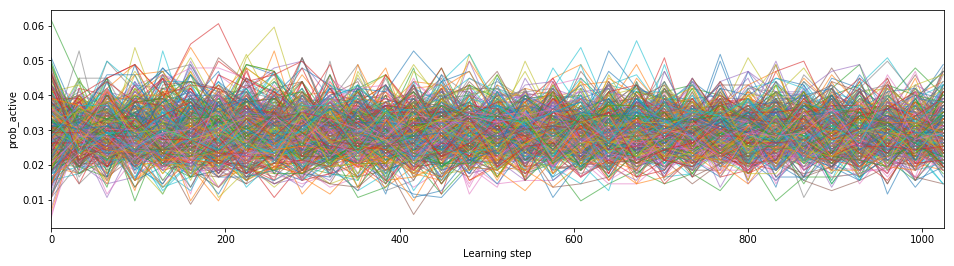

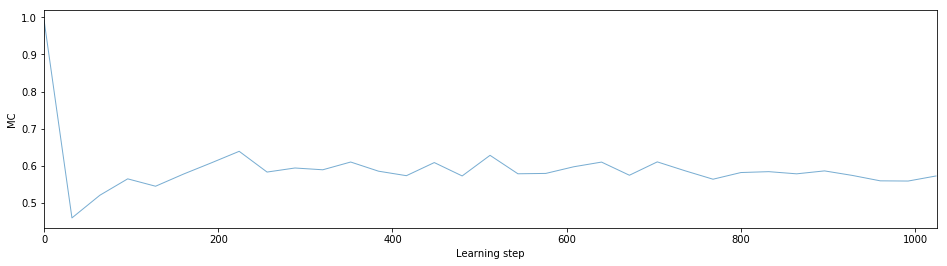

In [4]:
from shl_scripts.shl_experiments import SHL

DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 10
DEBUG_DOWNSCALE, verbose = 1, 10

list_figures = ['show_dico', 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var', 'time_plot_MC']
opts= dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, verbose=verbose, cache_dir='probe/cache_dir', datapath='../database')
shl = SHL(**opts)
tag = 'HULK'
data = shl.get_data(matname='data')
dico = shl.learn_dico(data=data, matname=tag + '_homeo', list_figures=list_figures)   

### control: learning without homeostasis

During the learning, to avoid divergence, the norm of the filters is shunted to $1$.

No cache found probe/cache_dir/HULK_nohomeo_dico.pkl: Learning the dictionary with algo = mp 
 Training on 65520 patches
Iteration   1 /   1025 (elapsed time:   1s,   0mn   1s)
Iteration  33 /   1025 (elapsed time:  11s,   0mn  11s)
Iteration  65 /   1025 (elapsed time:  21s,   0mn  21s)
Iteration  97 /   1025 (elapsed time:  31s,   0mn  31s)
Iteration  129 /   1025 (elapsed time:  41s,   0mn  41s)
Iteration  161 /   1025 (elapsed time:  51s,   0mn  51s)
Iteration  193 /   1025 (elapsed time:  62s,   1mn   2s)
Iteration  225 /   1025 (elapsed time:  72s,   1mn  12s)
Iteration  257 /   1025 (elapsed time:  83s,   1mn  23s)
Iteration  289 /   1025 (elapsed time:  93s,   1mn  33s)
Iteration  321 /   1025 (elapsed time:  104s,   1mn  44s)
Iteration  353 /   1025 (elapsed time:  115s,   1mn  55s)
Iteration  385 /   1025 (elapsed time:  125s,   2mn   5s)
Iteration  417 /   1025 (elapsed time:  135s,   2mn  15s)
Iteration  449 /   1025 (elapsed time:  145s,   2mn  25s)
Iteration  481 /   1025

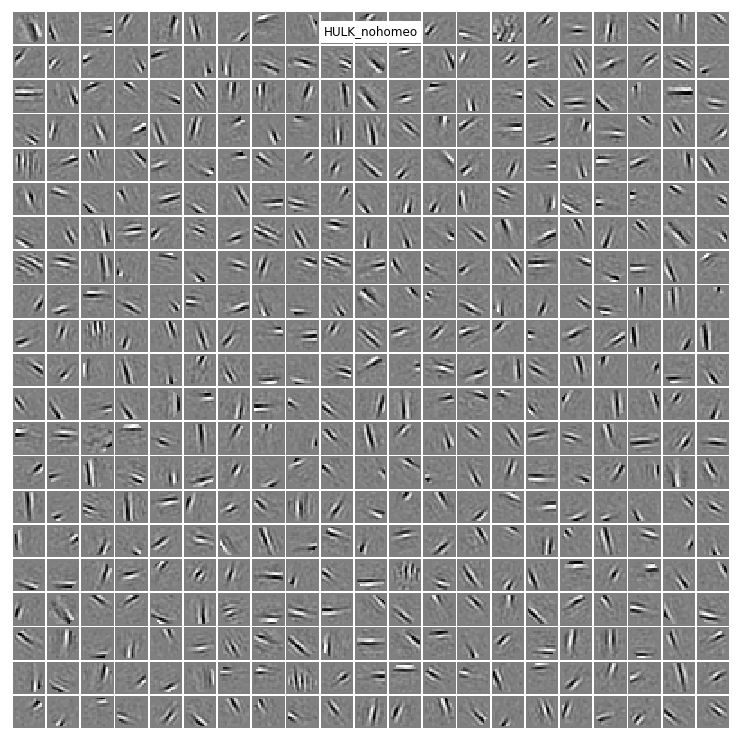

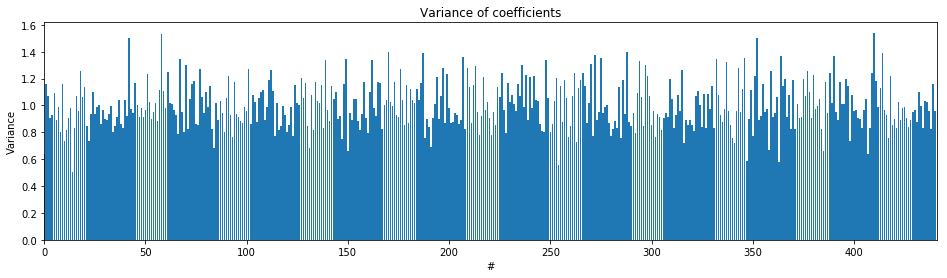

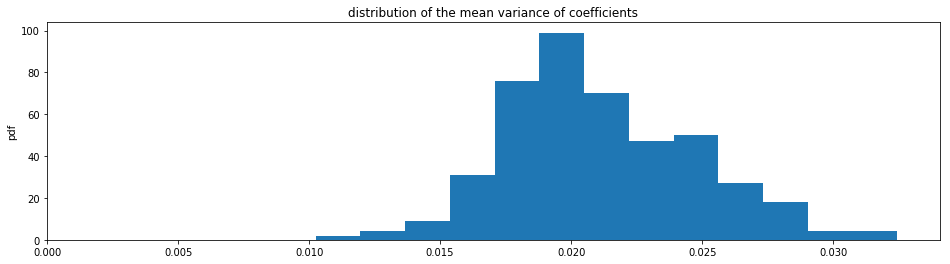

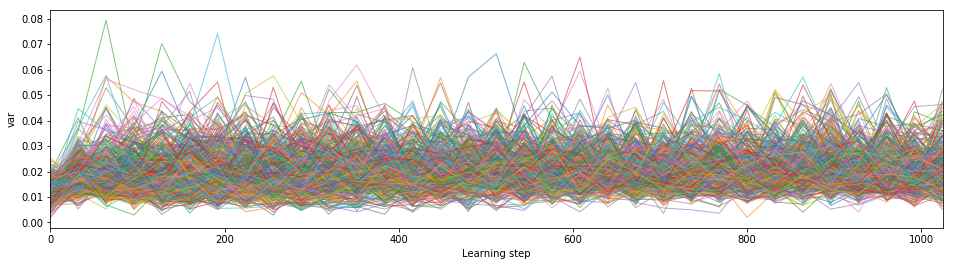

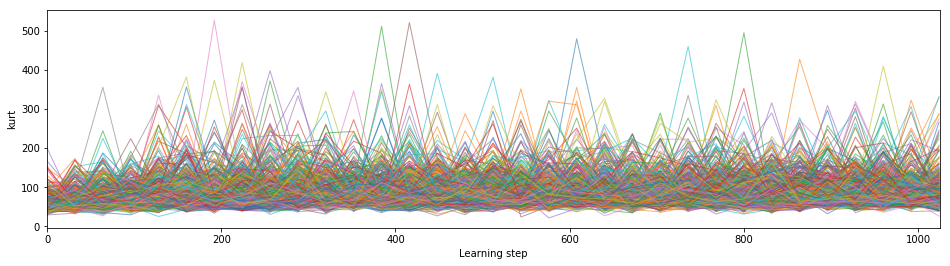

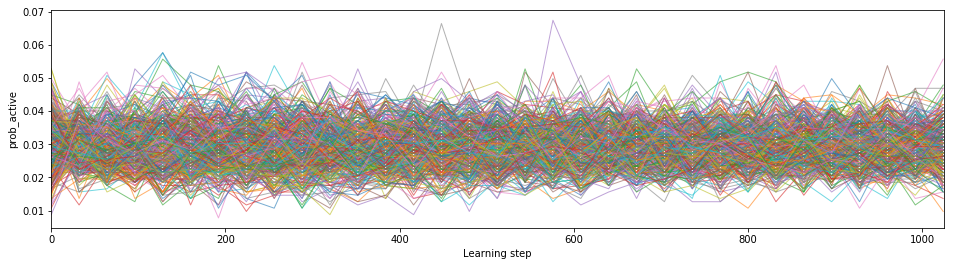

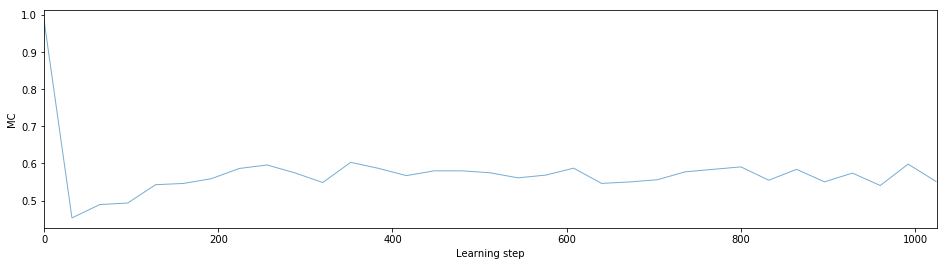

In [5]:
shl = SHL(homeo_method='None', **opts)
matname = tag + '_nohomeo'
dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures) 

# Sparse Hebbian Learning : reproducing SparseNet

If we test the convergence of SparseNet as a function of different learning parameters, it shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters:

See :
* http://blog.invibe.net/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the ``scikit-learn`` package
* http://blog.invibe.net/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

## Version used

In [6]:
!rm -fr probe/cache_dir/{tag}*

In [7]:
%load_ext version_information
%version_information numpy, shl_scripts

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 6.5.0
OS Darwin 17.7.0 x86_64 i386 64bit
numpy 1.15.1
shl_scripts 20171221
Fri Sep 07 15:09:42 2018 CEST